In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 

## Step 1: Helper Functions 

### Convert to datetime object and add new time features

In [88]:
columnsname = ['trip_duration','starttime','stoptime','start_station_ID','start_station_name',\
               'start_station_latitude','start_station_longitude','end_station_ID','end_station_name',\
               'end_station_latitude','end_station_longitude','bike_ID','user_type','birth_year','gender']

In [89]:
def to_datetime(df):
    df1 = df.copy()
    df1.columns=columnsname
    df1['starttime'] = pd.to_datetime(df1['starttime'])
    df1['stoptime'] = pd.to_datetime(df1['stoptime'])
    df1['start_date'] = df1['starttime'].dt.date
    df1['start_time'] = df1['starttime'].dt.time
    df1['start_hour'] = df1['starttime'].dt.hour
    df1['start_month'] = df1['starttime'].dt.month
    df1['start_dayofweek'] = df1['starttime'].dt.weekday   # Monday is 0, Sunday is 6
    #df1['start_dayofweek'] = df1['starttime'].dt.weekday_name  # The name of day in a week (e.g. Monday)
    df1['stop_date'] = df1['stoptime'].dt.date
    df1['stop_time'] = df1['stoptime'].dt.time
    df1['stop_hour'] = df1['stoptime'].dt.hour
    df1['stop_dayofweek'] = df1['stoptime'].dt.weekday
    return df1
# More datetime attributes can be found: https://kite.com/python/docs/pandas.core.indexes.accessors.DatetimeProperties 

### Take subset of each dataset

In [10]:
# Only focus on bike usage from 5am till 8pm 
def ignore_offpeak(df):
    df1 = df.copy()
    mask = df1['start_hour'].apply(lambda x: 5 <= x <= 20)
    return df1[mask]

## Step 2: Read csv and split all csv into train and test datasets

In [90]:
Jun2017 = pd.read_csv('../Tripdata/201706-citibike-tripdata.csv')

In [91]:
Jun2017.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                 float64
gender                       int64
dtype: object

In [92]:
Jun2017.shape

(1523268, 15)

In [93]:
Jun2017.sample(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
616357,291,2017-05-12 21:06:45,2017-05-12 21:11:36,2003,1 Ave & E 18 St,40.733812,-73.980544,438,St Marks Pl & 1 Ave,40.727791,-73.985649,19590,Subscriber,1997.0,1
70731,631,2017-05-02 09:36:16,2017-05-02 09:46:48,3255,8 Ave & W 31 St,40.750585,-73.994685,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,28832,Subscriber,1988.0,2
1291358,515,2017-05-26 21:35:17,2017-05-26 21:43:52,3461,Murray St & Greenwich St,40.714852,-74.011223,264,Maiden Ln & Pearl St,40.707065,-74.007319,26138,Subscriber,1992.0,2
1196315,188,2017-05-24 16:41:04,2017-05-24 16:44:13,320,Leonard St & Church St,40.717571,-74.005549,417,Barclay St & Church St,40.712912,-74.010202,27236,Subscriber,1966.0,1
108983,488,2017-05-02 19:35:46,2017-05-02 19:43:54,461,E 20 St & 2 Ave,40.735877,-73.982050,432,E 7 St & Avenue A,40.726218,-73.983799,25769,Subscriber,1991.0,2


In [94]:
Jun2017 = to_datetime(Jun2017)
Jun2017.sample(5)

,trip_duration,starttime,stoptime,start_station_ID,start_station_name,start_station_latitude,start_station_longitude,end_station_ID,end_station_name,end_station_latitude,...,gender,start_date,start_time,start_hour,start_month,start_dayofweek,stop_date,stop_time,stop_hour,stop_dayofweek
1051078,3092,2017-05-21 15:12:06,2017-05-21 16:03:39,3383,Cathedral Pkwy & Broadway,40.804213,-73.966991,328,Watts St & Greenwich St,40.724055,...,1,2017-05-21,15:12:06,15,5,6,2017-05-21,16:03:39,16,6
1021046,1075,2017-05-20 22:30:30,2017-05-20 22:48:25,3065,Union Ave & Wallabout St,40.700295,-73.950323,3106,Driggs Ave & N Henry St,40.723250,...,1,2017-05-20,22:30:30,22,5,5,2017-05-20,22:48:25,22,5
479674,708,2017-05-10 16:24:27,2017-05-10 16:36:16,522,E 51 St & Lexington Ave,40.757148,-73.972078,490,8 Ave & W 33 St,40.751551,...,1,2017-05-10,16:24:27,16,5,2,2017-05-10,16:36:16,16,2
1412752,1410,2017-05-29 22:24:24,2017-05-29 22:47:55,3434,W 88 St & West End Ave,40.790254,-73.977183,281,Grand Army Plaza & Central Park S,40.764397,...,1,2017-05-29,22:24:24,22,5,0,2017-05-29,22:47:55,22,0
389413,187,2017-05-08 22:23:43,2017-05-08 22:26:51,3308,Kane St & Clinton St,40.686176,-73.996453,3422,Columbia St & Degraw St,40.685930,...,1,2017-05-08,22:23:43,22,5,0,2017-05-08,22:26:51,22,0


In [95]:
# Only focus on time from 5 am till 8 pm 
Jun2017 = ignore_offpeak(Jun2017)
Jun2017.shape

(1393704, 24)

In [96]:
# Inspect Missing Values 
Jun2017.isna().sum(axis = 0)

trip_duration                   0
starttime                       0
stoptime                        0
start_station_ID                0
start_station_name              0
start_station_latitude          0
start_station_longitude         0
end_station_ID                  0
end_station_name                0
end_station_latitude            0
end_station_longitude           0
bike_ID                         0
user_type                       0
birth_year                 159691
gender                          0
start_date                      0
start_time                      0
start_hour                      0
start_month                     0
start_dayofweek                 0
stop_date                       0
stop_time                       0
stop_hour                       0
stop_dayofweek                  0
dtype: int64

In [97]:
# Take 10% as a subset
Jun2017_validate, Jun2017_train = train_test_split(May2017, test_size=0.05, random_state=42 )
Jun2017_notused, Jun2017_test = train_test_split(May2017_validate, test_size=0.05, random_state=42 )

In [98]:
May2017_train # 5% of original dataset

,trip_duration,starttime,stoptime,start_station_ID,start_station_name,start_station_latitude,start_station_longitude,end_station_ID,end_station_name,end_station_latitude,...,gender,start_date,start_time,start_hour,start_month,start_dayofweek,stop_date,stop_time,stop_hour,stop_dayofweek
627850,1229,2017-05-14 09:23:54,2017-05-14 09:44:23,173,Broadway & W 49 St,40.760683,-73.984527,173,Broadway & W 49 St,40.760683,...,0,2017-05-14,09:23:54,9,5,6,2017-05-14,09:44:23,9,6
296891,303,2017-05-06 18:49:04,2017-05-06 18:54:07,3236,W 42 St & Dyer Ave,40.758985,-73.993800,529,W 42 St & 8 Ave,40.757570,...,0,2017-05-06,18:49:04,18,5,5,2017-05-06,18:54:07,18,5
1315433,1138,2017-05-27 14:27:17,2017-05-27 14:46:16,532,S 5 Pl & S 4 St,40.710451,-73.960876,361,Allen St & Hester St,40.716059,...,1,2017-05-27,14:27:17,14,5,5,2017-05-27,14:46:16,14,5
459676,1213,2017-05-10 09:05:41,2017-05-10 09:25:54,354,Emerson Pl & Myrtle Ave,40.693631,-73.962236,152,Warren St & Church St,40.714740,...,1,2017-05-10,09:05:41,9,5,2,2017-05-10,09:25:54,9,2
860473,2081,2017-05-18 08:46:30,2017-05-18 09:21:11,519,Pershing Square North,40.751873,-73.977706,304,Broadway & Battery Pl,40.704633,...,1,2017-05-18,08:46:30,8,5,3,2017-05-18,09:21:11,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189116,988,2017-05-04 09:04:17,2017-05-04 09:20:45,302,Avenue D & E 3 St,40.720828,-73.977932,167,E 39 St & 3 Ave,40.748901,...,1,2017-05-04,09:04:17,9,5,3,2017-05-04,09:20:45,9,3
1420540,745,2017-05-30 08:19:55,2017-05-30 08:32:21,497,E 17 St & Broadway,40.737050,-73.990093,3427,Lafayette St & Jersey St,40.724305,...,1,2017-05-30,08:19:55,8,5,1,2017-05-30,08:32:21,8,1
1094657,2404,2017-05-22 18:54:45,2017-05-22 19:34:50,402,Broadway & E 22 St,40.740343,-73.989551,3319,14 St & 5 Ave,40.666287,...,1,2017-05-22,18:54:45,18,5,0,2017-05-22,19:34:50,19,0
474549,1361,2017-05-10 14:39:05,2017-05-10 15:01:46,490,8 Ave & W 33 St,40.751551,-73.993934,417,Barclay St & Church St,40.712912,...,1,2017-05-10,14:39:05,14,5,2,2017-05-10,15:01:46,15,2


In [99]:
May2017_test # 5% of validate dataset(4.75% of orignal dataset)

,trip_duration,starttime,stoptime,start_station_ID,start_station_name,start_station_latitude,start_station_longitude,end_station_ID,end_station_name,end_station_latitude,...,gender,start_date,start_time,start_hour,start_month,start_dayofweek,stop_date,stop_time,stop_hour,stop_dayofweek
940279,574,2017-05-19 14:03:44,2017-05-19 14:13:18,488,W 39 St & 9 Ave,40.756458,-73.993722,462,W 22 St & 10 Ave,40.746920,...,1,2017-05-19,14:03:44,14,5,4,2017-05-19,14:13:18,14,4
1048123,1855,2017-05-21 14:37:15,2017-05-21 15:08:11,501,FDR Drive & E 35 St,40.744219,-73.971212,3136,5 Ave & E 63 St,40.766368,...,0,2017-05-21,14:37:15,14,5,6,2017-05-21,15:08:11,15,6
590093,275,2017-05-12 14:27:44,2017-05-12 14:32:20,3286,E 89 St & 3 Ave,40.780628,-73.952167,3144,E 81 St & Park Ave,40.776777,...,1,2017-05-12,14:27:44,14,5,4,2017-05-12,14:32:20,14,4
135251,435,2017-05-03 10:29:13,2017-05-03 10:36:28,385,E 55 St & 2 Ave,40.757973,-73.966033,3443,W 52 St & 6 Ave,40.761330,...,1,2017-05-03,10:29:13,10,5,2,2017-05-03,10:36:28,10,2
1366892,595,2017-05-28 15:44:21,2017-05-28 15:54:17,447,8 Ave & W 52 St,40.763707,-73.985162,499,Broadway & W 60 St,40.769155,...,0,2017-05-28,15:44:21,15,5,6,2017-05-28,15:54:17,15,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916144,532,2017-05-19 07:09:23,2017-05-19 07:18:15,2006,Central Park S & 6 Ave,40.765909,-73.976342,359,E 47 St & Park Ave,40.755103,...,2,2017-05-19,07:09:23,7,5,4,2017-05-19,07:18:15,7,4
1271145,147,2017-05-26 15:53:57,2017-05-26 15:56:24,293,Lafayette St & E 8 St,40.730207,-73.991026,293,Lafayette St & E 8 St,40.730207,...,1,2017-05-26,15:53:57,15,5,4,2017-05-26,15:56:24,15,4
1414930,498,2017-05-30 06:27:48,2017-05-30 06:36:06,3290,E 89 St & York Ave,40.777945,-73.946041,3226,W 82 St & Central Park West,40.782750,...,1,2017-05-30,06:27:48,6,5,1,2017-05-30,06:36:06,6,1
393936,1142,2017-05-09 07:20:09,2017-05-09 07:39:12,422,W 59 St & 10 Ave,40.770513,-73.988038,486,Broadway & W 29 St,40.746201,...,1,2017-05-09,07:20:09,7,5,1,2017-05-09,07:39:12,7,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000287A114FF48>,
      dtype=object)

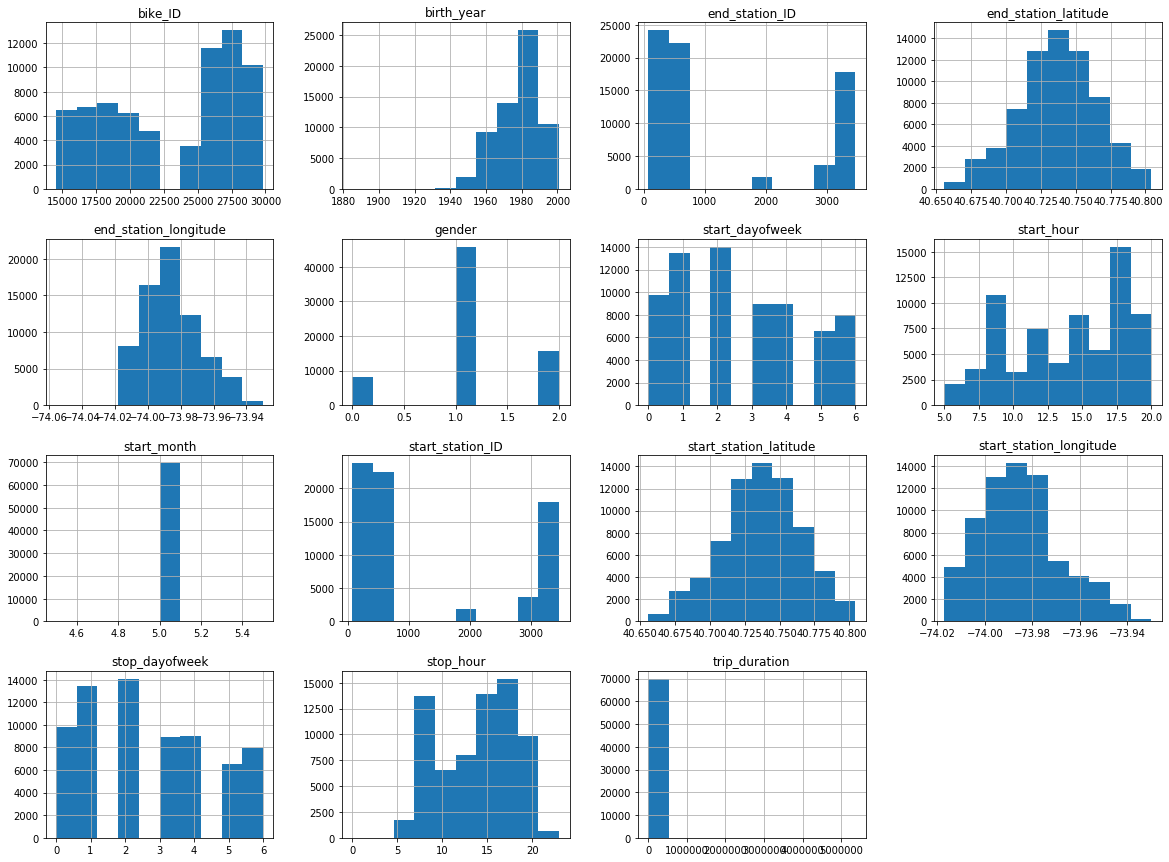

In [100]:
# Subset Data Hour Distribution
May2017_train.hist(figsize = (20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002878B4A0388>,
      dtype=object)

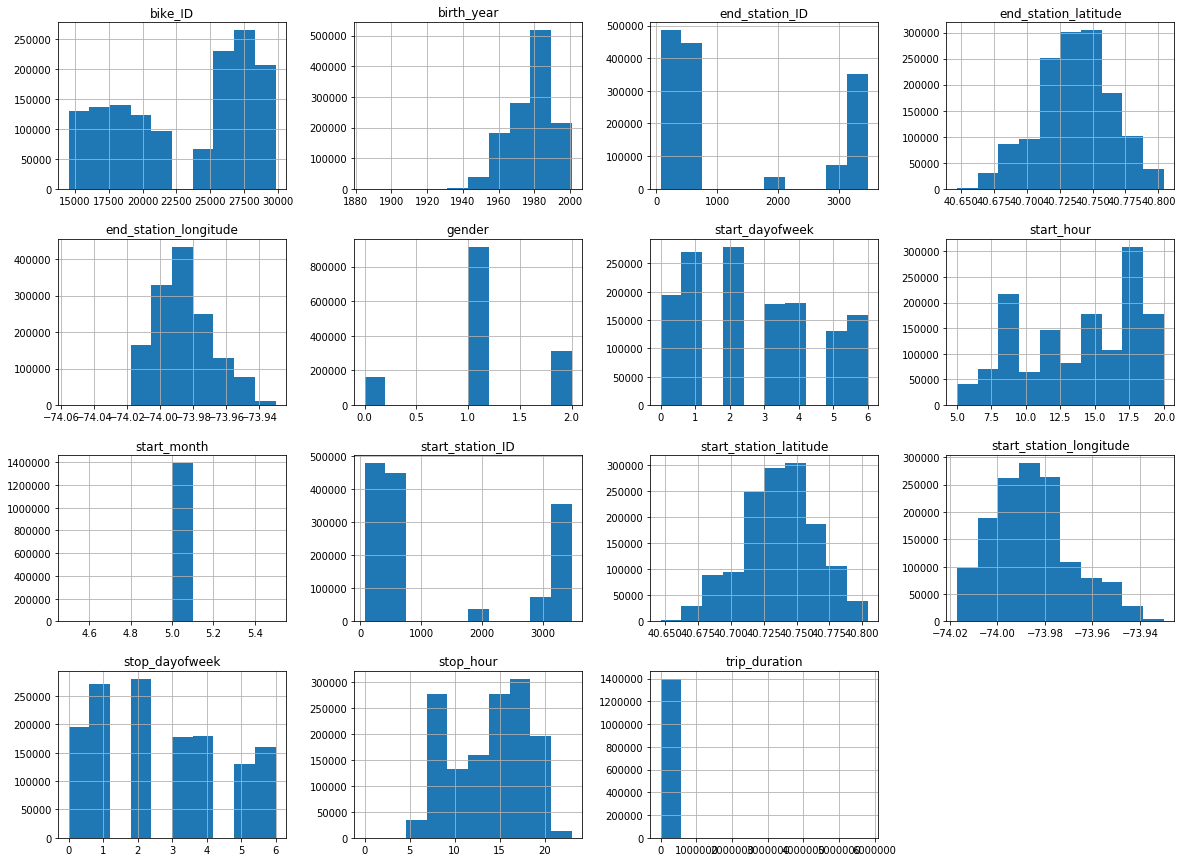

In [101]:
# Original Dataset Hour Distribution 
May2017.hist(figsize = (20,15))

In [102]:
May2017_train.to_csv('May2017train.csv')
May2017_test.to_csv('May2017test.csv')